In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('loan_data_preprocessed.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [23]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
Feature scaling means adjusting all your numerical features so they have similar ranges or magnitudes.
Because in raw data:
- ApplicantIncome could be in tens of thousands
- LoanAmount in hundreds
- Loan_Amount_Term in months (like 360)

These differences in scale can confuse models that rely on distance, gradient, or weights.
Our model is Logistic Regression which is gradient based so we will use Scaler for this purpose
eg: (The model “thinks” ApplicantIncome is far more important — just because its numbers are bigger.
Not because it’s actually more influential.)

Feature scaling ensures all your numeric features “run at the same speed” during training — so gradient descent moves evenly and reaches the best solution efficiently.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [27]:
X_train[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
154,-0.352802,-0.563228,-1.131588,0.280691
239,-0.343346,-0.563228,-0.592309,0.280691
448,-0.339471,0.050405,0.040758,0.280691
471,-0.445963,-0.024953,-0.393010,-2.486768
273,-0.451078,0.234495,0.040758,0.280691


In [28]:
X_train[num_cols].describe().round(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,491.00,491.00,491.00,491.00
mean,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.82,-0.56,-1.61,-5.07
25%,-0.41,-0.56,-0.54,0.28
50%,-0.26,-0.19,-0.22,0.28
75%,0.05,0.24,0.22,0.28
max,11.70,14.39,6.49,2.13


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)


In [30]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_predicted = model.predict(X_test)

In [38]:
y_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [39]:
model.score(X_test, y_test)

0.8617886178861789

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

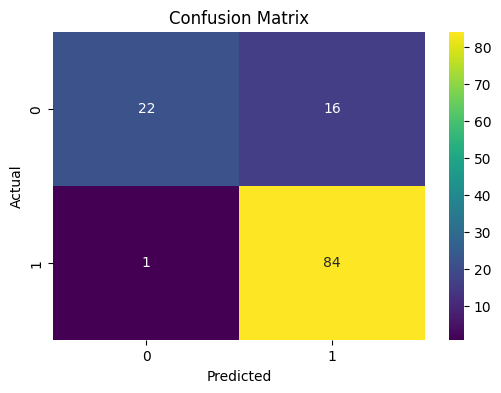

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from joblib import dump, load

In [37]:
dump(model, 'loan_prediction_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']